<a href="https://colab.research.google.com/github/drAshcroft/MAT421_Brian/blob/main/HW_Chapter1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import matplotlib.pyplot as plt

Example of binary encoding of numbers

In [5]:
print(100,'=',bin(100),'\n',32,'=',bin(32),'\n', 56734, '=', bin(56734))



100 = 0b1100100 
 32 = 0b100000 
 56734 = 0b1101110110011110


Examples of mathematical operations of binary numbers. Python can often do type conversions automatically

In [8]:
x=0b1100100 
y=0b100000 
z= 0b1101110110011110

print('0b1100100 * 0b100000 =',x*y)
print('0b100000  * 0b1101110110011110 =',y/z)
print('0b1100100 * 0b1101110110011110 =',x+z)

0b1100100 * 0b100000 = 3200
0b100000  * 0b1101110110011110 = 0.00056403567525646
0b1100100 * 0b1101110110011110 = 56834


Floating point numbers cannot be exactly specified in computers, so they are estimated by using 3 numbers to specify the sign, nearest lower power of 2, and fraction.  The book gives a simple method to load the values with python


In [9]:
import sys
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

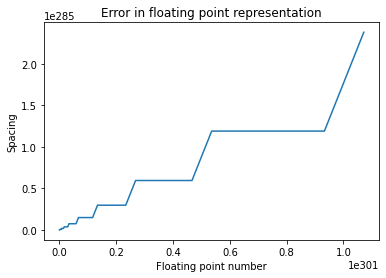

In [15]:
numbers=2**np.linspace(1,1000,5000)+3
plt.plot( numbers,  np.spacing(numbers))
plt.xlabel('Floating point number')
plt.ylabel('Spacing')
plt.title('Error in floating point representation')
plt.show()

Largest and smallest numbers are specified in system info and a few special numbers can also be encoded (infinity, nan, -infinity)

In [33]:
largest = (2**(2046-1023))*((1 + sum(0.5**np.arange(1, 53))))

smallest = (2**(1-1023))*(1+0)

print('largest',largest, largest==sys.float_info.max)
print('smallest',smallest, smallest==sys.float_info.min)

print('largest cannot add',(largest+1.0), largest==(largest+1.0))

print('but largest + largest =',largest+largest )

print('smallest=', 2**(-1074))
print('smallest divided by 2=', 2**(-1074)/2)
 

largest 1.7976931348623157e+308 True
smallest 2.2250738585072014e-308 True
largest cannot add 1.7976931348623157e+308 True
but largest + largest = inf
smallest 5e-324
smallest divided by 2 0.0


Because numbers cannot be exactly represented in memory, rounding errors can cause problems. a number of simple examples can be created.

In [42]:
"Incorrect division results, 10/3.0=",  10/3.0

('Incorrect division results, 10/3.0=', 3.3333333333333335)

In [44]:
"Incorrect addition .1 + .2 + .3 = ", .1+.2+.3,.1+.2+.3 ==.6

('Incorrect addition .1 + .2 + .3 = ', 0.6000000000000001, False)

Roundoff error can cause catastrophic failures, unless the number can be exactly represented by the floating points (1/2):

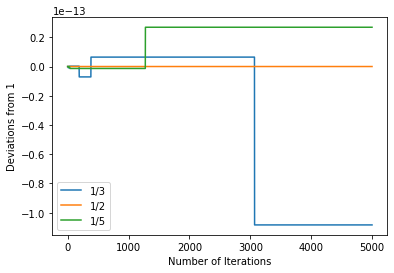

In [52]:
def add_and_subtract(iterations, eps): 
    result = 1 
     
    for i in range(iterations): 
        result += eps
 
    for i in range(iterations): 
        result -= eps
    return result 

errors = np.zeros(5000)
for i in range(5000):
  errors[i]=add_and_subtract(i,1/3.0)
plt.plot(errors-1, label='1/3')  

for i in range(5000):
  errors[i]=add_and_subtract(i,1/2.0)
plt.plot(errors-1, label='1/2')  

for i in range(5000):
  errors[i]=add_and_subtract(i,1/5.0)
plt.plot(errors-1, label='1/5')  

plt.xlabel('Number of Iterations')
plt.ylabel('Deviations from 1')
plt.legend()
plt.show()